<center> 
# R406: Using Python for data analysis and modelling

<br> <br> 

## Lecture 10: Symbolic computing with SymPy

<br>

<center> **Andrey Vassilev**

<br> 

<center> **2016/2017**
 

# Outline

1. Introduction
2. Basic SymPy objects and operations
3. Applications of specific modules
    - calculus - limits, derivatives, integrals
    - linear algebra
    - solving equations
    - statistics
    - printing, plotting? 

# Introduction: what is SymPy?

- SymPy is a Python library for computer algebra/symbolic computing.
- Roughly speaking, this means that you can use it to perform computations in a pen-and-paper manner, getting symbolic expressions rather that numbers as a result.
- SymPy is similar to other CAS like Mathematica, Maple, Matlab's Symbolic Math Toolbox or Maxima.
- SymPy is designed to be equally usable interactively or programmatically as a part of a larger workflow.
- See [this paper](https://peerj.com/articles/cs-103/) or the official [documentation](http://docs.sympy.org/latest/index.html) for more information.

# SymPy basics

Here is a simple example to illustrate the difference between "regular" computations and symbolic ones.

In a standard use case, we define variables and perform manipulations on them to get numerically evaluated results.

In [1]:
x = 2
y = 5
z = x**2 - y**3
z

-121

Notice that the third assignment, `z = x**2 - y**3`, binds the variable `z` to the specific, evaluated result, -121 in this case. There is no idea of keeping the expression $x^2-y^3$ as such.

Here is how the same operations work in symbolic form:

In [2]:
import sympy as sym
x,y = sym.symbols('x y')
z = x**2 - y**3
z

x**2 - y**3

The `symbols` function does just that — create symbolic objects `x` and `y` holding the symbols "x" and "y". There is nothing to prevent you from defining the objects to represent different symbols but it is confusing and discouraged by convention:

In [3]:
a,b = sym.symbols("X, Y") # Notice we can separate with commas as well
print(a**2+b**4)
del a,b

X**2 + Y**4


Obviously, more complicated expressions can be constructed but these can be difficult to read:

In [4]:
z = (sym.sqrt(x)+sym.exp(y**2-1)*sym.cos(x+sym.pi))/(x**(sym.ln(y))+y**5)
z

(sqrt(x) - exp(y**2 - 1)*cos(x))/(x**log(y) + y**5)

For that reason, SymPy offers pretty-printing functionality using available engines such as LaTeX or Matplotlib.

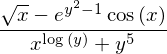

In [5]:
sym.init_printing()
z

If you are a LaTeX fan, you can also access the $\LaTeX$ code representing an expression using the `latex()` function:

In [6]:
print(sym.latex(z))

\frac{\sqrt{x} - e^{y^{2} - 1} \cos{\left (x \right )}}{x^{\log{\left (y \right )}} + y^{5}}


SymPy is clever enough to simplify expressions when you combine them:

In [14]:
z1 = x**2 - 4*x*y - 5*y**3
z2 = 3*x**2 + x*y + 4*y**3

In [23]:
z2+z1

Note that if you want to pretty print several objects in the same cell, you need to import `display` from `IPython.display`.

In [25]:
from IPython.display import display
display(z1)
display(z2)
display(z1+z2)

In [7]:
# Eq(x + 1, 4)
# There is also a method called equals that tests if two expressions are equal by evaluating them numerically at random points.
# a.equals(b)